In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [88]:
data = pd.read_csv (r'/Users/lovelbangura/Desktop/Project/10_Academy/Week1/Week1_challenge_data_source(CSV).csv')

In [42]:
df = pd.DataFrame(data, columns= ['bearer id',
'Dur. (ms)',
'Start',
'Start ms',
'End',
'End ms',
'Dur. (s)',
'IMSI',
'MSISDN/Number',
'IMEI',
'Last Location Name',
'Avg RTT DL (ms)',
'Avg RTT UL (ms)',
'Avg Bearer TP DL (kbps)',
'Avg Bearer TP UL (kbps)',
'TCP DL Retrans. Vol (Bytes)',
'TCP UL Retrans. Vol (Bytes)',
'DL TP < 50 Kbps (%)',
'50 Kbps < DL TP < 250 Kbps (%)',
'250 Kbps < DL TP < 1 Mbps (%)',
'DL TP > 1 Mbps (%)',
'UL TP < 10 Kbps (%)',
'10 Kbps < UL TP < 50 Kbps (%)',
'50 Kbps < UL TP < 300 Kbps (%)',
'UL TP > 300 Kbps (%)',
'HTTP DL (Bytes)',
'HTTP UL (Bytes)',
'Activity Duration DL (ms)',
'Activity Duration UL (ms)',
'Dur. (ms).1',
'Handset Manufacturer',
'Handset Type',
'Nb of sec with 125000B < Vol DL',
'Nb of sec with 1250B < Vol UL < 6250B',
'Nb of sec with 31250B < Vol DL < 125000B',
'Nb of sec with 37500B < Vol UL',
'Nb of sec with 6250B < Vol DL < 31250B',
'Nb of sec with 6250B < Vol UL < 37500B',
'Nb of sec with Vol DL < 6250B',
'Nb of sec with Vol UL < 1250B',
'Social Media DL (Bytes)',
'Social Media UL (Bytes)',
'YouTube DL (Bytes)',
'YouTube UL (Bytes)',
'Netflix DL (Bytes)',
'Netflix UL (Bytes)',
'Google DL (Bytes)',
'Google UL (Bytes)',
'Email DL (Bytes)',
'Email UL (Bytes)',
'Gaming DL (Bytes)',
'Gaming UL (Bytes)',
'Other DL',
'Other UL',
'Total DL (Bytes)',
'Total UL (Bytes)'])
df

,bearer id,Dur. (ms),Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,...,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL,Other UL,Total DL (Bytes),Total UL (Bytes)
0,NaN,1823652.0,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,NaN,2.082014e+14,3.366496e+10,3.552121e+13,...,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,2.780823e+08,1.434415e+07,NaN,NaN,308879636.0,36749741.0
1,NaN,1365104.0,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,NaN,2.082019e+14,3.368185e+10,3.579401e+13,...,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,6.087501e+08,1.170709e+06,NaN,NaN,653384965.0,53800391.0
2,NaN,1361762.0,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,NaN,2.082003e+14,3.376063e+10,3.528151e+13,...,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,2.295846e+08,3.956300e+05,NaN,NaN,279807335.0,27883638.0
3,NaN,1321509.0,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,NaN,2.082014e+14,3.375034e+10,3.535661e+13,...,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,7.995382e+08,1.084972e+07,NaN,NaN,846028530.0,43324218.0
4,NaN,1089009.0,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,NaN,2.082014e+14,3.369980e+10,3.540701e+13,...,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,5.277072e+08,3.529801e+06,NaN,NaN,569138589.0,38542814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,NaN,81230.0,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,NaN,2.082022e+14,3.365069e+10,3.548311e+13,...,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,5.266097e+08,9.197207e+06,NaN,NaN,574175259.0,57628851.0
149997,NaN,97970.0,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,NaN,2.082019e+14,3.366345e+10,3.566051e+13,...,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,6.268931e+08,4.735033e+06,NaN,NaN,666648844.0,39135081.0
149998,NaN,98249.0,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,NaN,2.082017e+14,3.362189e+10,3.572121e+13,...,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,5.535395e+08,1.339432e+07,NaN,NaN,592786405.0,34912224.0
149999,NaN,97910.0,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,NaN,2.082021e+14,3.361962e+10,8.618620e+13,...,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,3.525370e+08,2.529475e+06,NaN,NaN,371895920.0,29626096.0


In [4]:
df.head()

,bearer id,Dur. (ms),Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,...,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL,Other UL,Total DL (Bytes),Total UL (Bytes)
0,NaN,1823652.0,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,NaN,2.082014e+14,3.366496e+10,3.552121e+13,...,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0,NaN,NaN,308879636.0,36749741.0
1,NaN,1365104.0,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,NaN,2.082019e+14,3.368185e+10,3.579401e+13,...,3493924.0,920172.0,629046.0,308339.0,608750074.0,1170709.0,NaN,NaN,653384965.0,53800391.0
2,NaN,1361762.0,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,NaN,2.082003e+14,3.376063e+10,3.528151e+13,...,8535055.0,1694064.0,2690151.0,672973.0,229584621.0,395630.0,NaN,NaN,279807335.0,27883638.0
3,NaN,1321509.0,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,NaN,2.082014e+14,3.375034e+10,3.535661e+13,...,9023734.0,2788027.0,1439754.0,631229.0,799538153.0,10849722.0,NaN,NaN,846028530.0,43324218.0
4,NaN,1089009.0,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,NaN,2.082014e+14,3.369980e+10,3.540701e+13,...,6248284.0,1500559.0,1936496.0,173853.0,527707248.0,3529801.0,NaN,NaN,569138589.0,38542814.0


In [5]:
# n =10
# headset_used_by_customers = df['Handset Type'].value_counts()[:n].index.tolist()
 
def most_used( name, number ) -> pd.DataFrame:
        """
           Funtions the count the frequence of occurence
        """
        result = df[name].value_counts()[:number].index.tolist()
        return result
    
headset_used_by_customers= most_used('Handset Type', 10)
headset_used_by_customers

['Huawei B528S-23A',
 'Apple iPhone 6S (A1688)',
 'Apple iPhone 6 (A1586)',
 'undefined',
 'Apple iPhone 7 (A1778)',
 'Apple iPhone Se (A1723)',
 'Apple iPhone 8 (A1905)',
 'Apple iPhone Xr (A2105)',
 'Samsung Galaxy S8 (Sm-G950F)',
 'Apple iPhone X (A1901)']

In [6]:
# n=3
# top_3_handset_manufacturers = df['Handset Manufacturer'].value_counts()[:n].index.tolist()
# top_3_handset_manufacturers
top_3_handset_manufacturers = most_used('Handset Manufacturer', 3)
top_3_handset_manufacturers

['Apple', 'Samsung', 'Huawei']

# Apple Top 5 Headset

In [7]:
top =5
all_apple = df.loc[df['Handset Manufacturer'] == 'Apple']


only_apple = pd.DataFrame(all_apple, columns= [
'Handset Manufacturer',
'Handset Type',])

only_apple.value_counts()[:top]


Handset Manufacturer  Handset Type           
Apple                 Apple iPhone 6S (A1688)    9419
                      Apple iPhone 6 (A1586)     9023
                      Apple iPhone 7 (A1778)     6326
                      Apple iPhone Se (A1723)    5187
                      Apple iPhone 8 (A1905)     4993
dtype: int64

# Samsung Top 5 Headset

In [8]:
top =5
all_Samsung = df.loc[df['Handset Manufacturer'] == 'Samsung']


only_Samsung = pd.DataFrame(all_Samsung, columns= [
'Handset Manufacturer',
'Handset Type',])

only_Samsung.value_counts()[:top]

Handset Manufacturer  Handset Type                
Samsung               Samsung Galaxy S8 (Sm-G950F)    4520
                      Samsung Galaxy A5 Sm-A520F      3724
                      Samsung Galaxy J5 (Sm-J530)     3696
                      Samsung Galaxy J3 (Sm-J330)     3484
                      Samsung Galaxy S7 (Sm-G930X)    3199
dtype: int64

# Huawei Top 5 Headset

In [9]:
top =5
all_Huawei = df.loc[df['Handset Manufacturer'] == 'Huawei']


only_Huawei = pd.DataFrame(all_Huawei, columns= [
'Handset Manufacturer',
'Handset Type',])

only_Huawei.value_counts()[:top]

Handset Manufacturer  Handset Type                  
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
dtype: int64

# Total Upload

In [10]:
df = pd.DataFrame(data, columns= ['bearer id',
'Nb of sec with 125000B < Vol DL',
'Nb of sec with 1250B < Vol UL < 6250B',
'Nb of sec with 31250B < Vol DL < 125000B',
'Nb of sec with 37500B < Vol UL',
'Nb of sec with 6250B < Vol DL < 31250B',
'Nb of sec with 6250B < Vol UL < 37500B',
'Nb of sec with Vol DL < 6250B',
'Nb of sec with Vol UL < 1250B',
'Social Media DL (Bytes)',
'Social Media UL (Bytes)',
'YouTube DL (Bytes)',
'YouTube UL (Bytes)',
'Netflix DL (Bytes)',
'Netflix UL (Bytes)',
'Google DL (Bytes)',
'Google UL (Bytes)',
'Email DL (Bytes)',
'Email UL (Bytes)',
'Gaming DL (Bytes)',
'Gaming UL (Bytes)',
'Other DL',
'Other UL',
'Total DL (Bytes)',
'Total UL (Bytes)'])

total_upload = df['Total UL (Bytes)'].sum()
total_upload

6168180943816.0

# Total Download

In [11]:
total_download = df['Total DL (Bytes)'].sum()
total_download

68196514511845.0

# Total data volume (in Bytes) during this session for each application

In [12]:
social_media_totl_volume = df['Social Media DL (Bytes)'].sum() + df['Social Media UL (Bytes)'].sum()
social_media_totl_volume

274239359454.20804

In [13]:
youtube_totl_volume = df['YouTube DL (Bytes)'].sum() + df['YouTube UL (Bytes)'].sum()
youtube_totl_volume

0.0

In [14]:
netflix_totl_volume = df['Netflix DL (Bytes)'].sum() + df['Netflix UL (Bytes)'].sum()
netflix_totl_volume

3394313609363.538

In [15]:
google_total_volume = df['Google DL (Bytes)'].sum() + df['Google UL (Bytes)'].sum()
google_total_volume

1171101989130.5454

In [16]:
email_total_volume = df['Email DL (Bytes)'].sum() + df['Email UL (Bytes)'].sum()
email_total_volume

338867605596.30994

In [17]:
gaming_total_volume = df['Sum'] = df['Email DL (Bytes)'].sum() + df['Email UL (Bytes)'].sum()
gaming_total_volume

338867605596.30994

In [18]:
other_total_volume = df['Other DL'].sum() + df['Other UL'].sum()
other_total_volume

0.0

In [19]:
#showing mean, median, min, max, 25, 50, 75, std.

data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [20]:
#. Sum of number values in each column

data.isnull().sum() 

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [21]:
#Clumns that have null values

data.isnull().any()

Bearer Id                                    True
Start                                        True
Start ms                                     True
End                                          True
End ms                                       True
Dur. (ms)                                    True
IMSI                                         True
MSISDN/Number                                True
IMEI                                         True
Last Location Name                           True
Avg RTT DL (ms)                              True
Avg RTT UL (ms)                              True
Avg Bearer TP DL (kbps)                      True
Avg Bearer TP UL (kbps)                      True
TCP DL Retrans. Vol (Bytes)                  True
TCP UL Retrans. Vol (Bytes)                  True
DL TP < 50 Kbps (%)                          True
50 Kbps < DL TP < 250 Kbps (%)               True
250 Kbps < DL TP < 1 Mbps (%)                True
DL TP > 1 Mbps (%)                           True


In [22]:
# replace null value with mean
without_null_values = data.fillna(df.mean())
without_null_values

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [23]:
without_null_values.isnull().any()

Bearer Id                                    True
Start                                        True
Start ms                                     True
End                                          True
End ms                                       True
Dur. (ms)                                    True
IMSI                                         True
MSISDN/Number                                True
IMEI                                         True
Last Location Name                           True
Avg RTT DL (ms)                              True
Avg RTT UL (ms)                              True
Avg Bearer TP DL (kbps)                      True
Avg Bearer TP UL (kbps)                      True
TCP DL Retrans. Vol (Bytes)                  True
TCP UL Retrans. Vol (Bytes)                  True
DL TP < 50 Kbps (%)                          True
50 Kbps < DL TP < 250 Kbps (%)               True
250 Kbps < DL TP < 1 Mbps (%)                True
DL TP > 1 Mbps (%)                           True


# treat missing & outliers by replacing by the mean or the mode of the corresponding variable:


Average TCP retransmission

In [24]:
df = pd.DataFrame(data, columns= [
'Avg RTT DL (ms)',
'Avg RTT UL (ms)',
'Avg Bearer TP DL (kbps)',
'Avg Bearer TP UL (kbps)',
'Handset Type',])

df.describe()

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
count,122172.000000,122189.000000,150000.000000,150000.000000
mean,109.795706,17.662883,13300.045927,1770.428647
std,619.782739,84.793524,23971.878541,4625.355500
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,43.000000,47.000000
50%,45.000000,5.000000,63.000000,63.000000
75%,70.000000,15.000000,19710.750000,1120.000000
max,96923.000000,7120.000000,378160.000000,58613.000000


<AxesSubplot:>

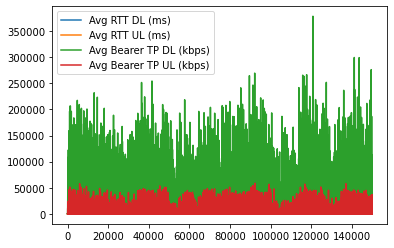

In [25]:
df.plot()

In [26]:
df.fillna(df.mean())

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,42.000000,5.000000,23.000000,44.000000,Samsung Galaxy A5 Sm-A520F
1,65.000000,5.000000,16.000000,26.000000,Samsung Galaxy J5 (Sm-J530)
2,109.795706,17.662883,6.000000,9.000000,Samsung Galaxy A8 (2018)
3,109.795706,17.662883,44.000000,44.000000,undefined
4,109.795706,17.662883,6.000000,9.000000,Samsung Sm-G390F
...,...,...,...,...,...
149996,32.000000,0.000000,52.000000,65.000000,Apple iPhone 8 Plus (A1897)
149997,27.000000,2.000000,23.000000,54.000000,Apple iPhone Se (A1723)
149998,43.000000,6.000000,43.000000,47.000000,Apple iPhone Xs (A2097)
149999,37.000000,5.000000,34.000000,37.000000,Huawei Fig-Lx1


# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:


In [27]:
n = 10

tcp_tcp_values = df["Avg Bearer TP DL (kbps)"][-n:].tolist()

    
tcp_tcp_values

[62.0, 23.0, 43.0, 55.0, 63420.0, 52.0, 23.0, 43.0, 34.0, nan]

In [28]:
n = 10

rtt_values = df["Avg RTT DL (ms)"][-n:].tolist()

    
rtt_values

[27.0, 37.0, 46.0, nan, 313.0, 32.0, 27.0, 43.0, 37.0, nan]

# number of xDR sessions

In [29]:
df = pd.DataFrame(data, columns= ['bearer id',
'Start',
'IMEI',
'Dur. (ms).1',
'Handset Manufacturer',
'Handset Type',])


In [30]:
df

,bearer id,Start,IMEI,Dur. (ms).1,Handset Manufacturer,Handset Type
0,NaN,4/4/2019 12:01,3.552121e+13,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F
1,NaN,4/9/2019 13:04,3.579401e+13,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530)
2,NaN,4/9/2019 17:42,3.528151e+13,1.361763e+09,Samsung,Samsung Galaxy A8 (2018)
3,NaN,4/10/2019 0:31,3.535661e+13,1.321510e+09,undefined,undefined
4,NaN,4/12/2019 20:10,3.540701e+13,1.089009e+09,Samsung,Samsung Sm-G390F
...,...,...,...,...,...,...
149996,NaN,4/29/2019 7:28,3.548311e+13,8.123076e+07,Apple,Apple iPhone 8 Plus (A1897)
149997,NaN,4/29/2019 7:28,3.566051e+13,9.797070e+07,Apple,Apple iPhone Se (A1723)
149998,NaN,4/29/2019 7:28,3.572121e+13,9.824953e+07,Apple,Apple iPhone Xs (A2097)
149999,NaN,4/29/2019 7:28,8.618620e+13,9.791063e+07,Huawei,Huawei Fig-Lx1


In [31]:
number_of_xdr = df['Dur. (ms).1'].sum()
number_of_xdr

15691365831902.0

In [32]:
df.count()

bearer id                    0
Start                   150000
IMEI                    149429
Dur. (ms).1             150000
Handset Manufacturer    149429
Handset Type            149429
dtype: int64

<AxesSubplot:>

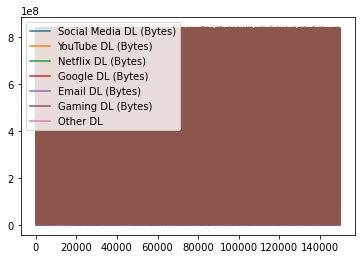

In [33]:
df = pd.DataFrame(data, columns= [
'Social Media DL (Bytes)',
'YouTube DL (Bytes)',
'Netflix DL (Bytes)',
'Google DL (Bytes)',
'Email DL (Bytes)',
'Gaming DL (Bytes)',
'Other DL'])

df.plot()

# Data consumption applications

Social Media, YouTube Netflix Google Email, Gaming, Other

          Media          data
0  Social Media  2.742394e+11
1       YouTube  0.000000e+00
2       Netflix  3.394314e+12
3        Google  1.171102e+12
4         Email  3.388676e+11
5        Gaming  3.388676e+11
6         Other  0.000000e+00


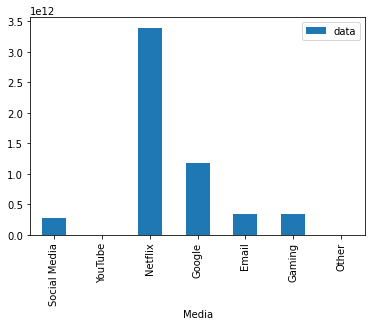

In [34]:
data_frame = {
    'Media': ['Social Media', 'YouTube', 'Netflix', 'Google','Email', 'Gaming', 'Other'],
     'data': [social_media_totl_volume,youtube_totl_volume,netflix_totl_volume,google_total_volume,email_total_volume,gaming_total_volume,other_total_volume ]
    }
var_df= pd.DataFrame(data_frame, columns=['Media', 'data'])
print(var_df)

# plotting bar graph
var_df.plot(x='Media', y='data', kind='bar')
plt.show()

# Task 2

In [89]:
df = pd.DataFrame(data, columns= ['bearer id',
'Dur. (ms).1','Total UL (Bytes)',
'Total DL (Bytes)','MSISDN/Number',])

df["total_Byte"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

df.head()

,bearer id,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes),MSISDN/Number,total_Byte
0,NaN,1.823653e+09,36749741.0,308879636.0,3.366496e+10,345629377.0
1,NaN,1.365104e+09,53800391.0,653384965.0,3.368185e+10,707185356.0
2,NaN,1.361763e+09,27883638.0,279807335.0,3.376063e+10,307690973.0
3,NaN,1.321510e+09,43324218.0,846028530.0,3.375034e+10,889352748.0
4,NaN,1.089009e+09,38542814.0,569138589.0,3.369980e+10,607681403.0


# Top 10 Customer Metrics

By Customer MSISDN/Number

In [102]:
df.nlargest(n=10, columns=[ 'total_Byte', ])

,bearer id,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes),MSISDN/Number,total_Byte
52132,NaN,220580598.0,75112879.0,880871897.0,3.367492e+10,955984776.0
139859,NaN,86400633.0,63147039.0,889494295.0,3.366469e+10,952641334.0
66831,NaN,86400028.0,57766252.0,894541212.0,3.366855e+10,952307464.0
76847,NaN,86400019.0,56303507.0,895471995.0,3.365881e+10,951775502.0
108567,NaN,146623551.0,60872436.0,889888225.0,3.366783e+10,950760661.0
61053,NaN,100129976.0,59581185.0,890405972.0,3.361083e+10,949987157.0
5384,NaN,50375546.0,59462396.0,890135859.0,3.360667e+10,949598255.0
119866,NaN,86399933.0,56908106.0,892383949.0,3.366261e+10,949292055.0
50913,NaN,275548136.0,65071313.0,884101225.0,3.366205e+10,949172538.0
147934,NaN,92773294.0,50811516.0,897998249.0,3.366853e+10,948809765.0


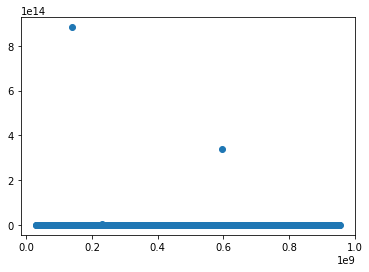

In [96]:
plt.scatter(df['total_Byte'], df['MSISDN/Number'])
plt.show()

In [86]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)